# Random forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

%load_ext nb_black
%config InlineBackend.figure_format = 'svg'

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/main_df_ML.csv"
)

df = df.drop(columns=["OWN_CAR_AGE"])

X = df.drop("TARGET", axis=1)
y = df["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["number"]).columns

<IPython.core.display.Javascript object>

In [3]:
numerical_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

<IPython.core.display.Javascript object>

In [4]:
RF_model = RandomForestClassifier(class_weight="balanced")

RF_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", RF_model)])

RF_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG...
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'Income_Class'],
      dtype='object'))])),
                ('model', RandomForestClassifier(class_weight='balanced'))])

<IPython.core.display.Javascript object>

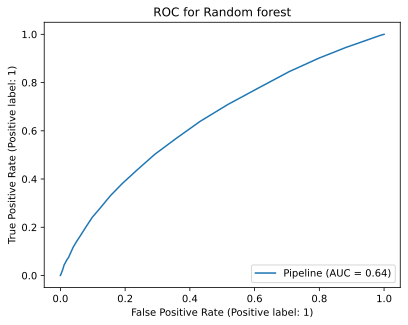

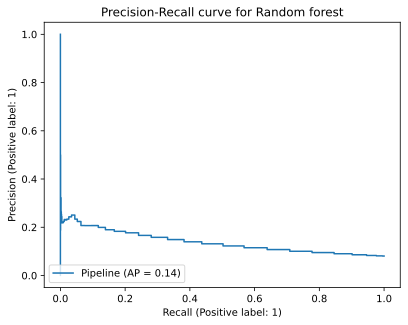

<IPython.core.display.Javascript object>

In [5]:
RocCurveDisplay.from_estimator(RF_pipeline, X_test, y_test)
plt.title("ROC for Random forest")
plt.show()

PrecisionRecallDisplay.from_estimator(RF_pipeline, X_test, y_test)
plt.title("Precision-Recall curve for Random forest")
plt.show()

## Conclusions

Metrics of interest for this model is areas under the ROC and PR curves (respectively): 0.64 and 0.14.